## Importing useful packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from keras.losses import CategoricalCrossentropy
from keras.metrics import CategoricalAccuracy
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns; sns.set()  # for plot styling

# Data Exploration

## Data Loading and Manipulation

In [2]:
# Reading the data
data = pd.read_csv("Dataset.csv")
df = pd.DataFrame(data)
df.head()

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,1469.17,Nozzle,equiGrain,13,3.84,6.47,46.87,65.73,16.52,16.82,0.93,10,0,0,Bottom,Die
1,1793.64,Block,singleGrain,19,2.62,3.48,44.70,54.22,35.38,6.14,4.26,19,0,0,Bottom,Investment
2,700.60,Blade,equiGrain,28,0.76,1.34,9.54,51.83,35.95,8.81,3.41,35,3,0,Bottom,Investment
3,1082.10,Nozzle,colGrain,9,2.01,2.19,20.29,57.03,23.33,16.86,2.78,0,1,0,Top,Continuous
4,1838.83,Blade,colGrain,16,4.13,3.87,16.13,59.62,27.37,11.45,1.56,10,0,0,Top,Die


## Data Preprocessing and EDA

In [3]:
# finding various attributes of the dataset
print('Shape of the data (rows and columns):')
print(df.shape)
print()
print('List of the column names:')
print(df.columns)
print()
print('The data type of all the columns (all just floats here):')
print(df.dtypes)

Shape of the data (rows and columns):
(1000, 16)

List of the column names:
Index(['Lifespan', 'partType', 'microstructure', 'coolingRate', 'quenchTime',
       'forgeTime', 'HeatTreatTime', 'Nickel%', 'Iron%', 'Cobalt%',
       'Chromium%', 'smallDefects', 'largeDefects', 'sliverDefects',
       'seedLocation', 'castType'],
      dtype='object')

The data type of all the columns (all just floats here):
Lifespan          float64
partType           object
microstructure     object
coolingRate         int64
quenchTime        float64
forgeTime         float64
HeatTreatTime     float64
Nickel%           float64
Iron%             float64
Cobalt%           float64
Chromium%         float64
smallDefects        int64
largeDefects        int64
sliverDefects       int64
seedLocation       object
castType           object
dtype: object


In [4]:
# Making list of numerical and categorical features
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns
num_without_target = numeric_cols.drop('Lifespan')
target = ['Lifespan']
all_features = df.columns

In [5]:
print(numeric_cols)
print(categorical_cols)
print(num_without_target)
print(all_features)
print(target)

Index(['Lifespan', 'coolingRate', 'quenchTime', 'forgeTime', 'HeatTreatTime',
       'Nickel%', 'Iron%', 'Cobalt%', 'Chromium%', 'smallDefects',
       'largeDefects', 'sliverDefects'],
      dtype='object')
Index(['partType', 'microstructure', 'seedLocation', 'castType'], dtype='object')
Index(['coolingRate', 'quenchTime', 'forgeTime', 'HeatTreatTime', 'Nickel%',
       'Iron%', 'Cobalt%', 'Chromium%', 'smallDefects', 'largeDefects',
       'sliverDefects'],
      dtype='object')
Index(['Lifespan', 'partType', 'microstructure', 'coolingRate', 'quenchTime',
       'forgeTime', 'HeatTreatTime', 'Nickel%', 'Iron%', 'Cobalt%',
       'Chromium%', 'smallDefects', 'largeDefects', 'sliverDefects',
       'seedLocation', 'castType'],
      dtype='object')
['Lifespan']


In [6]:
df.describe()

,Lifespan,coolingRate,quenchTime,forgeTime,HeatTreatTime,Nickel%,Iron%,Cobalt%,Chromium%,smallDefects,largeDefects,sliverDefects
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1298.556320,17.639000,2.764230,5.464600,30.194510,60.243080,24.553580,12.434690,2.768650,17.311000,0.550000,0.292000
std,340.071434,7.491783,1.316979,2.604513,16.889415,5.790475,7.371737,4.333197,1.326496,12.268365,1.163982,1.199239
min,417.990000,5.000000,0.500000,1.030000,1.030000,50.020000,6.660000,5.020000,0.510000,0.000000,0.000000,0.000000
25%,1047.257500,11.000000,1.640000,3.170000,16.185000,55.287500,19.387500,8.597500,1.590000,7.000000,0.000000,0.000000
50%,1266.040000,18.000000,2.755000,5.475000,29.365000,60.615000,24.690000,12.585000,2.865000,18.000000,0.000000,0.000000
75%,1563.050000,24.000000,3.970000,7.740000,44.955000,65.220000,29.882500,16.080000,3.922500,26.000000,0.000000,0.000000
max,2134.530000,30.000000,4.990000,10.000000,59.910000,69.950000,43.650000,19.990000,4.990000,61.000000,4.000000,8.000000


In [7]:
# Checking the null valuses
print(df.isnull().sum())

Lifespan          0
partType          0
microstructure    0
coolingRate       0
quenchTime        0
forgeTime         0
HeatTreatTime     0
Nickel%           0
Iron%             0
Cobalt%           0
Chromium%         0
smallDefects      0
largeDefects      0
sliverDefects     0
seedLocation      0
castType          0
dtype: int64


#### Creating scatter plots using the Lifespan feature alongside all numerical features individually

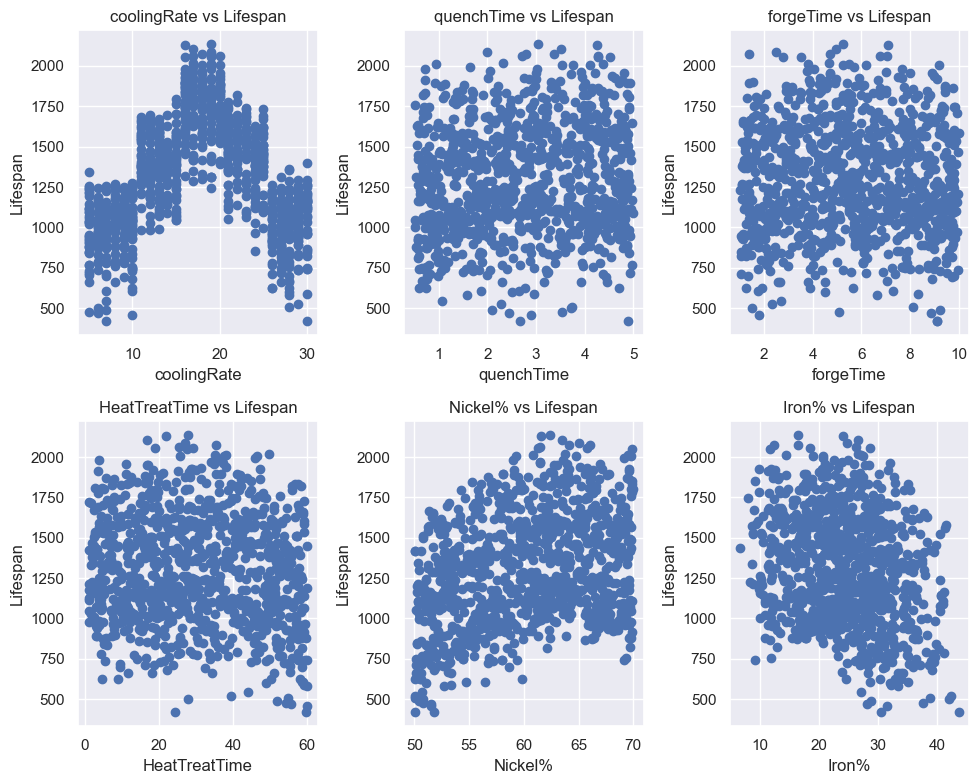

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the features and create scatter plots
for idx, feature in enumerate(num_without_target[:6]):
    if idx < len(axes):  # Ensure we don't exceed the number of subplots
        axes[idx].scatter(df[feature], df['Lifespan'])
        axes[idx].set_title(f'{feature} vs Lifespan')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Lifespan')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

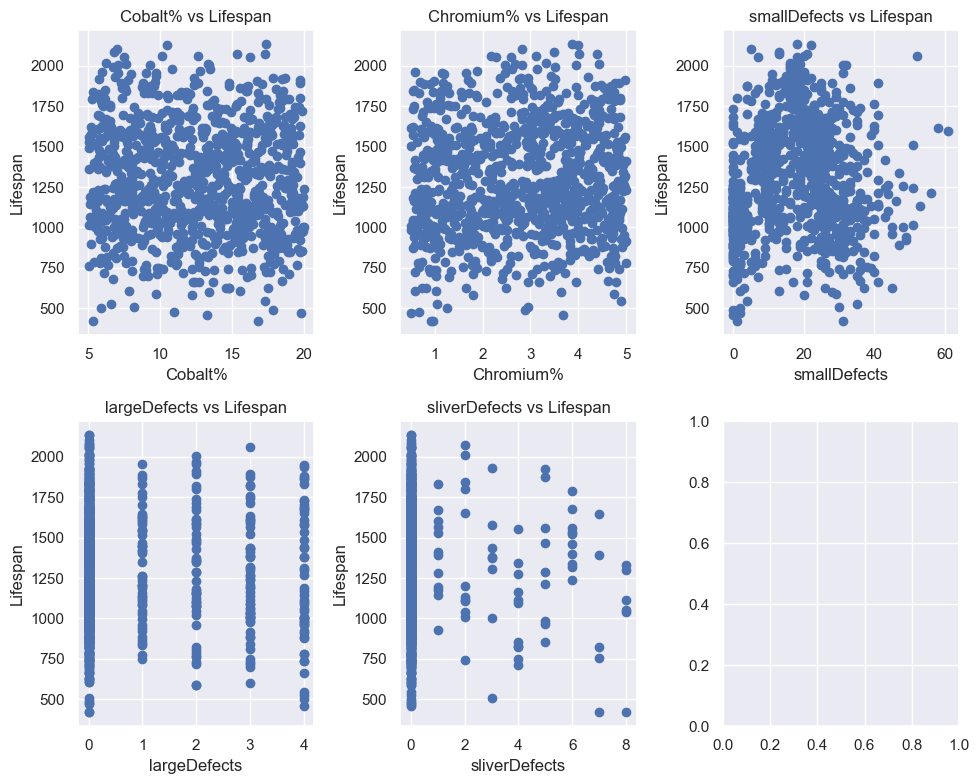

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the features and create scatter plots
for idx, feature in enumerate(num_without_target[6:]):
    if idx < len(axes):  # Ensure we don't exceed the number of subplots
        axes[idx].scatter(df[feature], df['Lifespan'])
        axes[idx].set_title(f'{feature} vs Lifespan')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Lifespan')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### Creating box plot using the Lifespan feature alongside all categorical features

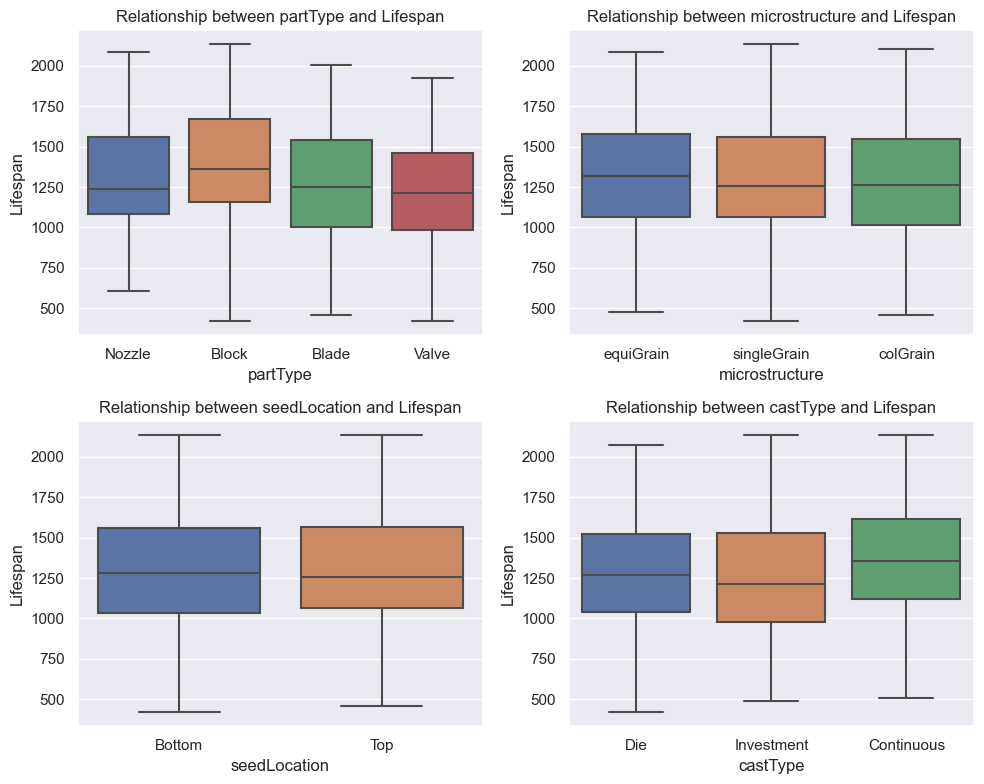

In [10]:
categorical_features = ['partType', 'microstructure', 'seedLocation', 'castType']
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the features and create box plots using Seaborn
for idx, feature in enumerate(categorical_features):
    if idx < len(axes):  # Ensure we don't exceed the number of subplots
        sns.boxplot(x=feature, y='Lifespan', data=df, ax=axes[idx])
        axes[idx].set_title(f'Relationship between {feature} and Lifespan')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Lifespan')


plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### Checking the Correlation among numerical features by Heatmap

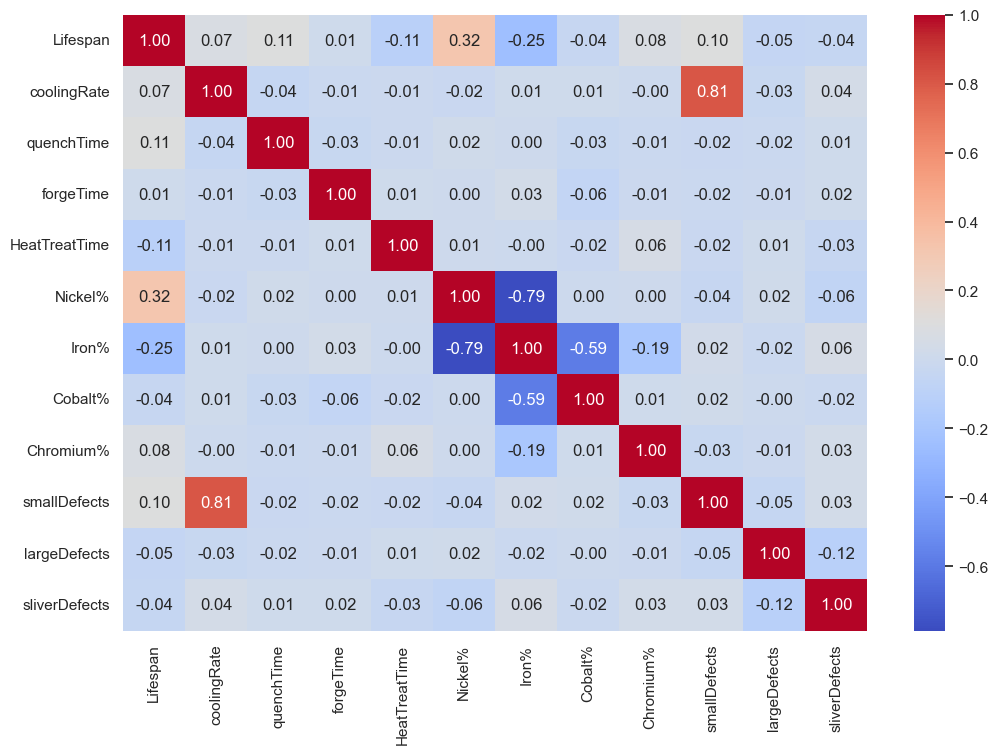

In [11]:
correlation_matrix = df[numeric_cols].corr()

# Figure size
plt.figure(figsize=(12,8))

# Creating heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
#

# Show the plot
plt.show()

According to the heatmap it is clear that there have two strong linear relationship. Small_defects and colling_rate has a positive relation where nickel% and Iron% has negative relation.

In [12]:
# Categorical features will be apply in model
categorical_final = ['partType', 'castType']

# Regression Implementation

### Data Preprocessing

####  Split data in Train, Valid and Test set

In [13]:
X = df.drop(columns=['Lifespan','microstructure', 'seedLocation'])
y = df['Lifespan']

In [14]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.10, shuffle=True, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.11, shuffle=True, random_state=0)

#### Standardizing the numerical data  and  encoding the categorical data by OneHotEncoder

In [15]:
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore')

#Apply encoder and sclaing on data
numerical_transformer = Pipeline(steps=[
    ('scale', scaler)
])

categorical_transformer = Pipeline(steps=[
    ('categorical', onehot)
])

preprocessor =ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_without_target),
    ('cat', categorical_transformer, categorical_final)
])

scal_encod_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor)
])

In [16]:
X_train=scal_encod_pipeline.fit_transform(X_train)
X_valid=scal_encod_pipeline.fit_transform(X_valid)
X_test=scal_encod_pipeline.fit_transform(X_test)

In [17]:
print('The shape of `X_train`:', X_train.shape)
print('The shape of `X_valid`:', X_valid.shape)
print('The shape of `X_test`:', X_test.shape)

The shape of `X_train`: (801, 18)
The shape of `X_valid`: (99, 18)
The shape of `X_test`: (100, 18)


## Linear Regression Model

In [18]:
################
# Training Data
################
obj = sklearn.linear_model.LinearRegression()
obj.fit(X_train, y_train)

y_pred_train = obj.predict(X_train)
MSE_train = sklearn.metrics.mean_squared_error(y_train, y_pred_train)
R2_train = sklearn.metrics.r2_score(y_train, y_pred_train)

#The mean squared error loss
print('Mean squared loss of train:', MSE_train)
#The R2 score of train
print('R2 score of train:',R2_train)


y_pred_valid = obj.predict(X_valid)
MSE_valid = sklearn.metrics.mean_squared_error(y_valid, y_pred_valid)
R2_valid = sklearn.metrics.r2_score(y_valid, y_pred_valid)

#The mean squared error loss
print('Mean squared loss of valid:', MSE_valid)
#The R2 score of train
print('R2 score of valid:',R2_valid)

y_pred_test = obj.predict(X_test)
MSE_valid = sklearn.metrics.mean_squared_error(y_test, y_pred_test)
R2_valid = sklearn.metrics.r2_score(y_test, y_pred_test)

#The mean squared error loss
print('Mean squared loss of test:', MSE_valid)
#The R2 score of train
print('R2 score of test:',R2_valid)

Mean squared loss of train: 94563.31268355182
R2 score of train: 0.1974839137568608
Mean squared loss of valid: 1.7143768704105568e+28
R2 score of valid: -2.109146307182093e+23
Mean squared loss of test: 4.365492907307989e+27
R2 score of test: -3.3659071223695237e+22


In [19]:
A = df.drop(columns=['Lifespan','microstructure', 'seedLocation'])[:100]
y = df['Lifespan'][:100]

In [20]:
A=scal_encod_pipeline.fit_transform(A)

In [21]:
y_lin = obj.predict(A)
MSE_valid = sklearn.metrics.mean_squared_error(y, y_lin)
R2_valid = sklearn.metrics.r2_score(y, y_lin)

#The mean squared error loss
print('Mean squared loss of valid:', MSE_valid)
#The R2 score of train
print('R2 score of valid:',R2_valid)

Mean squared loss of valid: 2.0619550081789984e+28
R2 score of valid: -1.7709690596607592e+23


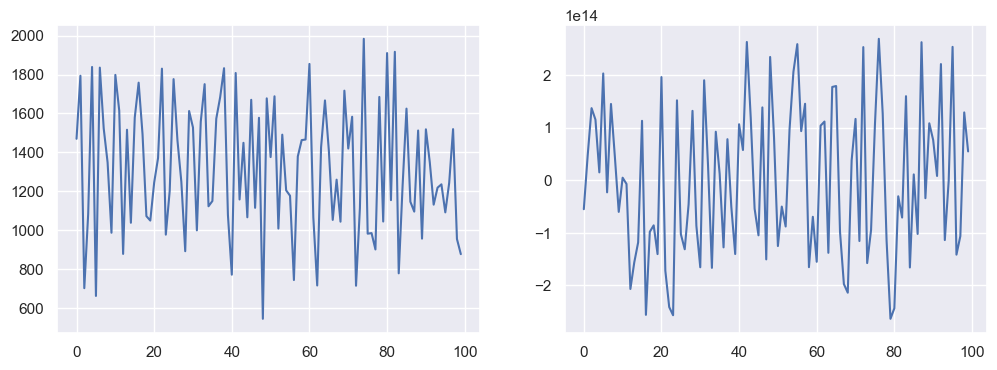

In [22]:
fig, ax =plt.subplots(1,2, figsize=(12,4))
ax[0].plot(y)
ax[1].plot(y_lin)

The linear model indicates no linear relationship between target features and other variables. It may be more effective to explore polynomial regression, as there could be a non-linear relationship.

## Polynomial

Degree: 1
Training Set MSE: 95229.07274913196
Training Set R2 Score: 0.1919936709543142
Validation Set MSE: 81280.32267031251
Validation Set R2 Score: 0.039152435021642784
Degree: 2
Training Set MSE: 18565.295369944564
Training Set R2 Score: 0.8424758770986299
Validation Set MSE: 22533.370299413153
Validation Set R2 Score: 0.7336239169378347
Degree: 3
Training Set MSE: 18062.489651939934
Training Set R2 Score: 0.8467421183913323
Validation Set MSE: 83763.355479286
Validation Set R2 Score: 0.009799500019885388
Degree: 4
Training Set MSE: 854.7741761423816
Training Set R2 Score: 0.9927473519977736
Validation Set MSE: 1.6409728092120422e+17
Validation Set R2 Score: -1939860320586.7542


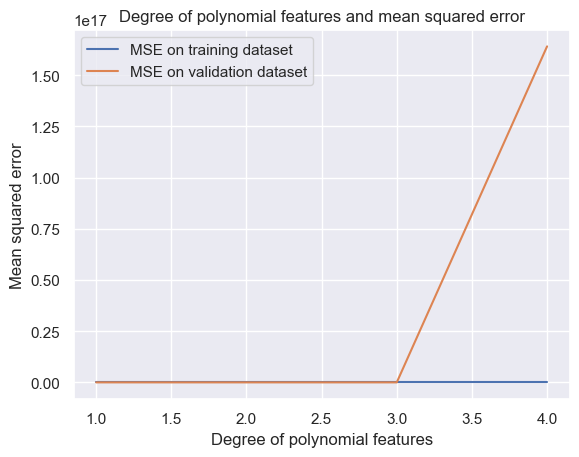

The best degree of polynomials: 2
Test Set MSE: 23644.736304668506
Test Set R2 Score: 0.8176930119363996


In [23]:
# Separate features and target variable
X = df.drop(columns=['Lifespan','microstructure', 'seedLocation'])
y = df['Lifespan']

# Split the data into training, validation, and test sets
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.10, shuffle=True, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.12, shuffle=True, random_state=0)

# Initialize lists to store MSE and R² values for each degree
mse_train_list = []
mse_valid_list = []
R2_train_list = []
R2_valid_list = []

# Define numerical and categorical feature columns (specify these lists)
num_without_target = X.select_dtypes(include=['float64', 'int64']).columns.tolist()  # List of numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()  # List of categorical columns

# Loop through polynomial degrees from 1 to 4
for degree in range(1, 5):
    print(f"Degree: {degree}")

    # Define the transformers
    poly = PolynomialFeatures(degree=degree)
    scaler = StandardScaler()
    onehot = OneHotEncoder(handle_unknown='ignore')

    # Apply PolynomialFeatures and Scaling only to numerical features
    numerical_transformer = Pipeline(steps=[
        ('poly', poly),
        ('scale', scaler)
    ])

    # Apply OneHotEncoder to categorical features
    categorical_transformer = Pipeline(steps=[
        ('onehot', onehot)
    ])

    # Combine numerical and categorical transformations using ColumnTransformer
    preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_transformer, num_without_target),  # Apply poly and scale to numerical
        ('cat', categorical_transformer, categorical_cols)  # One-hot encode categorical features
    ])

    # Create a pipeline that applies preprocessing and then the model
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())  # Linear regression model
    ])

    # Fit the model on the training set
    model_pipeline.fit(X_train, y_train)

    # Make predictions and evaluate on training and validation sets
    y_pred_train = model_pipeline.predict(X_train)
    y_pred_valid = model_pipeline.predict(X_valid)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_valid = mean_squared_error(y_valid, y_pred_valid)
    R2_train = r2_score(y_train, y_pred_train)
    R2_valid = r2_score(y_valid, y_pred_valid)

    mse_train_list.append(mse_train)
    mse_valid_list.append(mse_valid)
    R2_train_list.append(R2_train)
    R2_valid_list.append(R2_valid)

    # Print the results
    print("Training Set MSE:", mse_train)
    print("Training Set R2 Score:", R2_train)
    print("Validation Set MSE:", mse_valid)
    print("Validation Set R2 Score:", R2_valid)

# Plot MSE values for training and validation sets
degrees = [1, 2, 3, 4]
plt.plot(degrees, mse_train_list, label='MSE on training dataset')
plt.plot(degrees, mse_valid_list, label='MSE on validation dataset')

# Labels and title for the plot
plt.xlabel('Degree of polynomial features')
plt.ylabel('Mean squared error')
plt.title('Degree of polynomial features and mean squared error')

# Add legend to the plot
plt.legend()

# Show the plot
plt.show()

# Find the best degree based on validation MSE
best_degree = np.nanargmin(mse_valid_list) + 1  # +1 since degrees are 1-indexed
print('The best degree of polynomials:', best_degree)

# Final evaluation on the test set with the best degree
# Re-run the pipeline with the best degree on the full training set
best_poly = PolynomialFeatures(degree=best_degree)
numerical_transformer = Pipeline(steps=[
    ('poly', best_poly),
    ('scale', scaler)
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_without_target),
    ('cat', categorical_transformer, categorical_final)
])

# Final model pipeline
final_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge())
])

# Fit on entire training/validation data
final_model_pipeline.fit(X_train_valid, y_train_valid)

# Test set predictions and evaluation
y_pred_test = final_model_pipeline.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
R2_test = r2_score(y_test, y_pred_test)

print("Test Set MSE:", mse_test)
print("Test Set R2 Score:", R2_test)


In [24]:
# Define the transformers
degree = 2
poly = PolynomialFeatures(degree=degree)
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore')

# Apply PolynomialFeatures and Scaling only to numerical features
numerical_transformer = Pipeline(steps=[
    ('poly', poly),
    ('scale', scaler)
])

# Apply OneHotEncoder to categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', onehot)
])

# Combine numerical and categorical transformations using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_without_target),  # Apply poly and scale to numerical
    ('cat', categorical_transformer, categorical_final)  # One-hot encode categorical features
])

# Create a pipeline that applies preprocessing and then the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge())  # Ridge regression model
])

# Fit the model
model_pipeline.fit(X_train, y_train)

# Make predictions on training, validation, and test sets
y_pred_train = model_pipeline.predict(X_train)
y_pred_valid = model_pipeline.predict(X_valid)
y_pred_test = model_pipeline.predict(X_test)

# Calculate MSE and R² scores for each dataset
mse_train = mean_squared_error(y_train, y_pred_train)
R2_train = r2_score(y_train, y_pred_train)
mse_valid = mean_squared_error(y_valid, y_pred_valid)
R2_valid = r2_score(y_valid, y_pred_valid)
mse_test = mean_squared_error(y_test, y_pred_test)
R2_test = r2_score(y_test, y_pred_test)

# Append MSE and R² results to lists
mse_train_list.append(mse_train)
R2_train_list.append(R2_train)
mse_valid_list.append(mse_valid)
R2_valid_list.append(R2_valid)

# Print results
print("Training Set MSE:", mse_train)
print("Training Set R2 Score:", R2_train)
print("Validation Set MSE:", mse_valid)
print("Validation Set R2 Score:", R2_valid)
print("Test Set MSE:", mse_test)
print("Test Set R2 Score:", R2_test)


Training Set MSE: 18814.86208212959
Training Set R2 Score: 0.8403583359198362
Validation Set MSE: 23284.138515248807
Validation Set R2 Score: 0.7247487822391837
Test Set MSE: 24543.079165832372
Test Set R2 Score: 0.8107665578132938


In [25]:
mse_train = mean_squared_error(y_train, y_pred_train)
R2_train = r2_score(y_train, y_pred_train)
# Print results
print("Training Set MSE:", mse_train)
print("Training Set R2 Score:", R2_train)

Training Set MSE: 18814.86208212959
Training Set R2 Score: 0.8403583359198362


In [26]:
A = df.drop(columns=['Lifespan','microstructure', 'seedLocation'])[:100]
y = df['Lifespan'][:100]

In [27]:
y_poly = model_pipeline.predict(A)

In [28]:
mse_train = mean_squared_error(y, y_poly)
R2_train = r2_score(y, y_poly)
print("Training Set MSE:", mse_train)
print("Training Set R2 Score:", R2_train)

Training Set MSE: 19752.35502431454
Training Set R2 Score: 0.8303512469246899


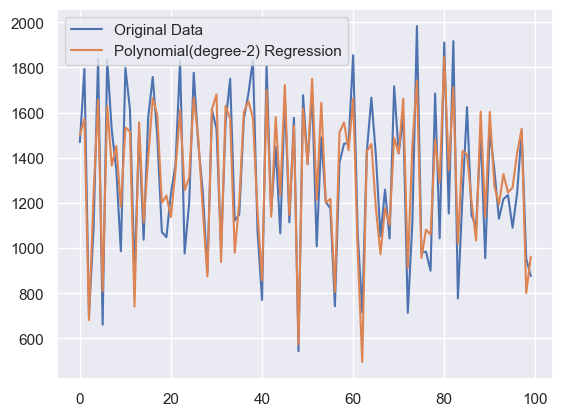

In [29]:
plt.plot(y, label='Original Data')   # Add a label for the first plot
plt.plot(y_poly, label='Polynomial(degree-2) Regression')  # Add a label for the second plot

# Add the legend to the plot
plt.legend()

# Display the plot
plt.show()

## Ridge regression

##### Finding the best value of 𝛼 by iterating 𝛼

alpha: 1e-10, Validation mean squared error: 22532.58947565558.
alpha: 1e-09, Validation mean squared error: 22532.589476114892.
alpha: 1e-08, Validation mean squared error: 22532.58948071204.
alpha: 1e-07, Validation mean squared error: 22532.589526684038.
alpha: 1e-06, Validation mean squared error: 22532.589986405033.
alpha: 1e-05, Validation mean squared error: 22532.594583647544.
alpha: 0.0001, Validation mean squared error: 22532.64055940657.
alpha: 0.001, Validation mean squared error: 22533.100650420765.
alpha: 0.01, Validation mean squared error: 22537.734735373706.
alpha: 0.1, Validation mean squared error: 22587.232088555615.
alpha: 1.0, Validation mean squared error: 23284.138515248807.
alpha: 10.0, Validation mean squared error: 30824.790965389344.
alpha: 100.0, Validation mean squared error: 52977.97784405382.
alpha: 1000.0, Validation mean squared error: 71254.83600112672.
alpha: 10000.0, Validation mean squared error: 79367.54194058952.
alpha: 100000.0, Validation mean 

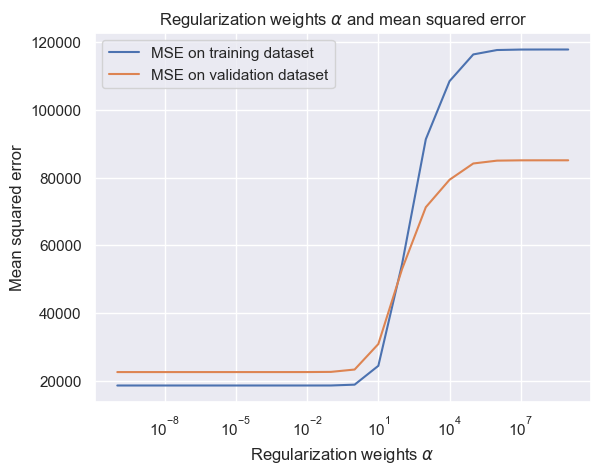

The best alpha: 1e-10


In [30]:
# Generate alpha values from 10^(-10) to 10^(10)
alpha_indices = np.arange(20)
alphas = 10.0 ** (alpha_indices - 10)

# Degree for polynomial transformation
degree = 2

# Arrays to store the training and validation MSE
mse_train_array = np.full(len(alphas), np.nan)
mse_valid_array = np.full(len(alphas), np.nan)

for alpha_index, alpha in enumerate(alphas):
    # Define the transformers
    poly = PolynomialFeatures(degree=degree)
    scaler = StandardScaler()
    onehot = OneHotEncoder(handle_unknown='ignore')

    # Apply PolynomialFeatures and Scaling only to numerical features
    numerical_transformer = Pipeline(steps=[
        ('poly', poly),
        ('scale', scaler)
    ])

    # Apply OneHotEncoder to categorical features
    categorical_transformer = Pipeline(steps=[
        ('onehot', onehot)
    ])

    # Combine numerical and categorical transformations
    preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_transformer, num_without_target),
        ('cat', categorical_transformer, categorical_final)
    ])

    # Create a pipeline with preprocessing and Ridge regression with current alpha
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', Ridge(alpha=alpha))
    ])

    # Fit the model
    model_pipeline.fit(X_train, y_train)

    # Predict and calculate MSE for training and validation sets
    y_pred_train = model_pipeline.predict(X_train)
    y_pred_valid = model_pipeline.predict(X_valid)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_valid = mean_squared_error(y_valid, y_pred_valid)

    # Store the MSE values for this alpha
    mse_train_array[alpha_index] = mse_train
    mse_valid_array[alpha_index] = mse_valid
    print(f'alpha: {alpha}, Validation mean squared error: {mse_valid}.')

# Plot MSE against alphas for both training and validation sets
plt.plot(alphas, mse_train_array, label='MSE on training dataset')
plt.plot(alphas, mse_valid_array, label='MSE on validation dataset')
plt.xlabel(r'Regularization weights $\alpha$')
plt.ylabel('Mean squared error')
plt.title(r'Regularization weights $\alpha$ and mean squared error')
plt.xscale('log')
plt.legend()
plt.show()

# Select the best alpha based on minimum validation MSE
best_alpha_index = np.argmin(mse_valid_array)
best_alpha = alphas[best_alpha_index]
print('The best alpha:', best_alpha)

In [31]:
# Define transformers
degree = 2  # Degree of polynomial features
poly = PolynomialFeatures(degree=degree)
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore')

# Pipeline for numerical features: polynomial transformation and scaling
numerical_transformer = Pipeline(steps=[
    ('poly', poly),
    ('scale', scaler)
])

# Pipeline for categorical features: one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', onehot)
])

# Combine numerical and categorical transformations
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_without_target),
    ('cat', categorical_transformer, categorical_final)
])

# Define a pipeline to apply preprocessing and then the Ridge regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=best_alpha))  # Use the best alpha found earlier
])

# Fit the model to the training data
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = model_pipeline.predict(X_test)

# Calculate and print MSE and R² score on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Test set Mean Squared Error (MSE): {mse_test}')
print(f'Test set R² score: {r2_test}')

Test set Mean Squared Error (MSE): 24066.539267477303
Test set R² score: 0.8144408027886583


In [32]:
# Make predictions on the test set
y_test_pred = model_pipeline.predict(X_test)

# Calculate and print MSE and R² score on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Test set Mean Squared Error (MSE): {mse_test}')
print(f'Test set R² score: {r2_test}')

Test set Mean Squared Error (MSE): 24066.539267477303
Test set R² score: 0.8144408027886583


In [33]:
A = df.drop(columns=['Lifespan','microstructure', 'seedLocation'])[:100]
y = df['Lifespan'][:100]

In [34]:
y_ridge = model_pipeline.predict(A)

In [35]:
# Calculate and print MSE and R² score on the test set
mse_test = mean_squared_error(y, y_ridge)
r2_test = r2_score(y, y_ridge)

print(f'Test set Mean Squared Error (MSE): {mse_test}')
print(f'Test set R² score: {r2_test}')

Test set Mean Squared Error (MSE): 19602.798272674758
Test set R² score: 0.8316357578803937


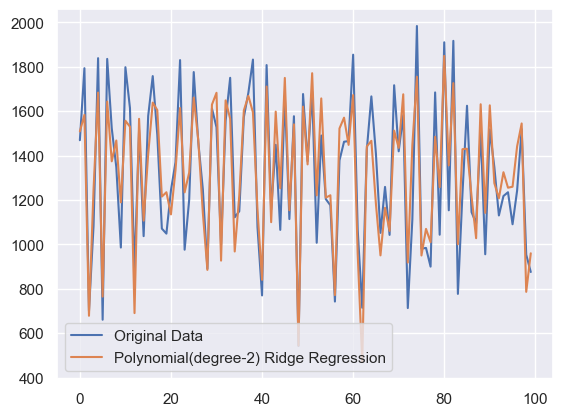

In [36]:
plt.plot(y, label='Original Data')   # Add a label for the first plot
plt.plot(y_ridge, label='Polynomial(degree-2) Ridge Regression')  # Add a label for the second plot

# Add the legend to the plot
plt.legend()

# Display the plot
plt.show()

### Lasso Regression

alpha: 1e-10, Validation mean squared error: 22532.5894753967.
alpha: 1e-09, Validation mean squared error: 22532.589473526474.
alpha: 1e-08, Validation mean squared error: 22532.58945482807.
alpha: 1e-07, Validation mean squared error: 22532.589267836705.
alpha: 1e-06, Validation mean squared error: 22532.58739793379.
alpha: 1e-05, Validation mean squared error: 22532.56869927634.
alpha: 0.0001, Validation mean squared error: 22532.391887878377.
alpha: 0.001, Validation mean squared error: 22530.61725626558.
alpha: 0.01, Validation mean squared error: 22522.642625587843.
alpha: 0.1, Validation mean squared error: 22464.006650097574.
alpha: 1.0, Validation mean squared error: 23487.830960774936.
alpha: 10.0, Validation mean squared error: 37422.74392152054.
alpha: 100.0, Validation mean squared error: 84383.0522421148.
alpha: 1000.0, Validation mean squared error: 85114.3348108734.
alpha: 10000.0, Validation mean squared error: 85114.3348108734.
alpha: 100000.0, Validation mean squared

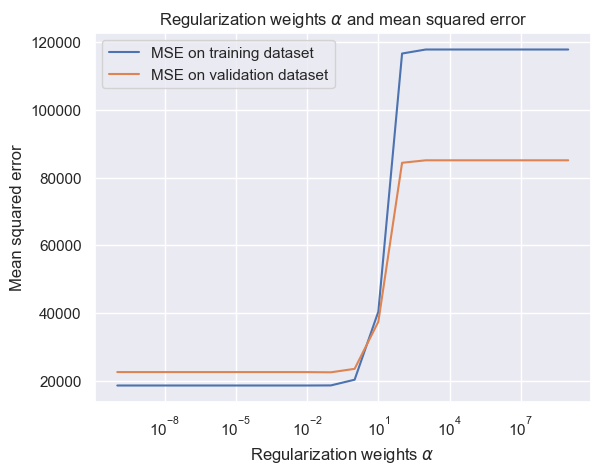

The best alpha: 0.1


In [37]:
# Generate alpha values from 10^(-10) to 10^(10)
alpha_indices = np.arange(20)
alphas = 10.0 ** (alpha_indices - 10)

# Degree for polynomial transformation
degree = 2

# Arrays to store the training and validation MSE
mse_train_array = np.full(len(alphas), np.nan)
mse_valid_array = np.full(len(alphas), np.nan)

for alpha_index, alpha in enumerate(alphas):
    # Define the transformers
    poly = PolynomialFeatures(degree=degree)
    scaler = StandardScaler()
    onehot = OneHotEncoder(handle_unknown='ignore')

    # Apply PolynomialFeatures and Scaling only to numerical features
    numerical_transformer = Pipeline(steps=[
        ('poly', poly),
        ('scale', scaler)
    ])

    # Apply OneHotEncoder to categorical features
    categorical_transformer = Pipeline(steps=[
        ('onehot', onehot)
    ])

    # Combine numerical and categorical transformations
    preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_transformer, num_without_target),
        ('cat', categorical_transformer, categorical_final)
    ])

    # Create a pipeline with preprocessing and Lasso regression with current alpha
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', Lasso(alpha=alpha, max_iter=10000))
    ])

    # Fit the model
    model_pipeline.fit(X_train, y_train)

    # Predict and calculate MSE for training and validation sets
    y_pred_train = model_pipeline.predict(X_train)
    y_pred_valid = model_pipeline.predict(X_valid)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_valid = mean_squared_error(y_valid, y_pred_valid)

    # Store the MSE values for this alpha
    mse_train_array[alpha_index] = mse_train
    mse_valid_array[alpha_index] = mse_valid
    print(f'alpha: {alpha}, Validation mean squared error: {mse_valid}.')

# Plot MSE against alphas for both training and validation sets
plt.plot(alphas, mse_train_array, label='MSE on training dataset')
plt.plot(alphas, mse_valid_array, label='MSE on validation dataset')
plt.xlabel(r'Regularization weights $\alpha$')
plt.ylabel('Mean squared error')
plt.title(r'Regularization weights $\alpha$ and mean squared error')
plt.xscale('log')
plt.legend()
plt.show()

# Select the best alpha based on minimum validation MSE
best_alpha_index = np.argmin(mse_valid_array)
best_alpha = alphas[best_alpha_index]
print('The best alpha:', best_alpha)

In [38]:
# Define transformers
degree = 2  # Degree of polynomial features
poly = PolynomialFeatures(degree=degree)
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore')

# Pipeline for numerical features: polynomial transformation and scaling
numerical_transformer = Pipeline(steps=[
    ('poly', poly),
    ('scale', scaler)
])

# Pipeline for categorical features: one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', onehot)
])

# Combine numerical and categorical transformations
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_without_target),
    ('cat', categorical_transformer, categorical_final)
])

# Define a pipeline to apply preprocessing and then the Lasso regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=best_alpha, max_iter=10000))  # Use the best alpha found earlier
])

# Fit the model to the training data
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = model_pipeline.predict(X_test)

# Calculate and print MSE and R² score on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Test set Mean Squared Error (MSE): {mse_test}')
print(f'Test set R² score: {r2_test}')

Test set Mean Squared Error (MSE): 24032.30820393438
Test set R² score: 0.8147047330779333


In [39]:
# Make predictions on the test set
y_lasso = model_pipeline.predict(A)

# Calculate and print MSE and R² score on the test set
mse_test = mean_squared_error(y, y_lasso)
r2_test = r2_score(y, y_lasso)

print(f'Test set Mean Squared Error (MSE): {mse_test}')
print(f'Test set R² score: {r2_test}')

Test set Mean Squared Error (MSE): 19478.10138219689
Test set R² score: 0.832706752805095


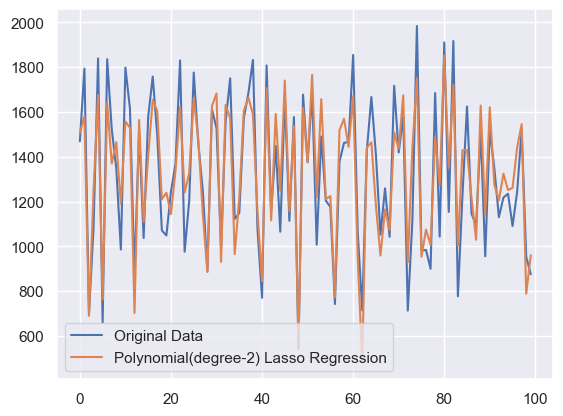

In [40]:
plt.plot(y, label='Original Data')   # Add a label for the first plot
plt.plot(y_lasso, label='Polynomial(degree-2) Lasso Regression')  # Add a label for the second plot

# Add the legend to the plot
plt.legend()

# Display the plot
plt.show()

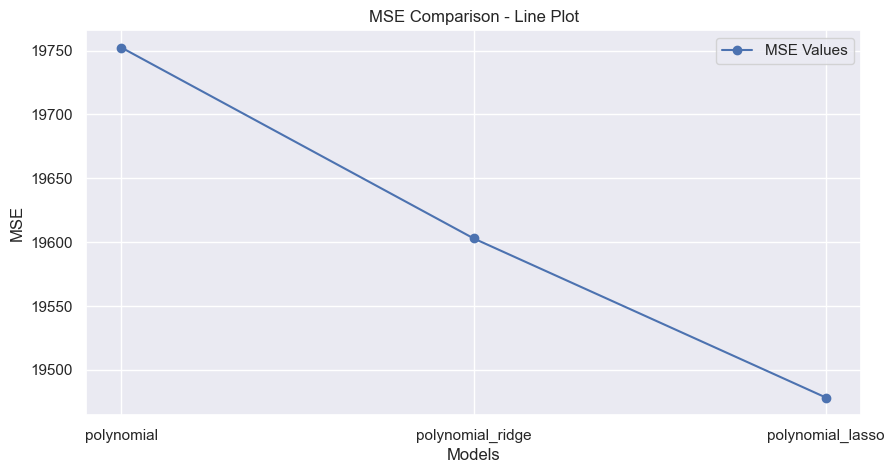

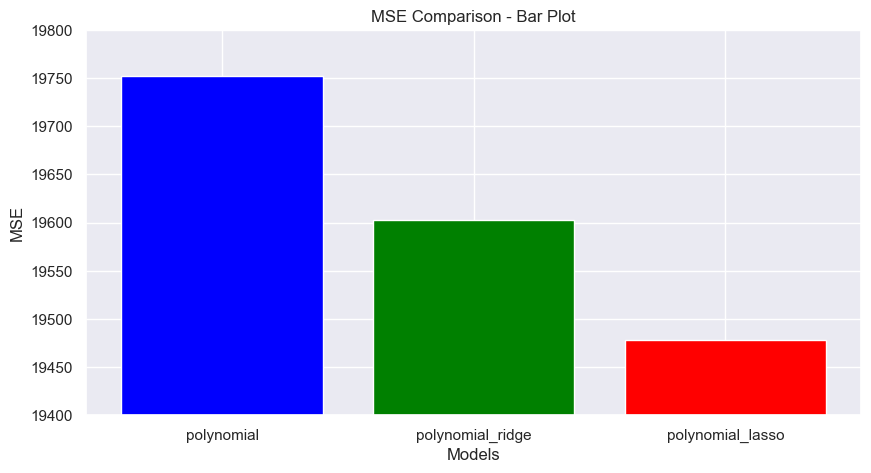

In [41]:
from sklearn.metrics import mean_squared_error

# Calculate mean squared errors
errors = {
    
    'polynomial': mean_squared_error(y, y_poly),
    'polynomial_ridge': mean_squared_error(y, y_ridge),
    'polynomial_lasso': mean_squared_error(y, y_lasso)
}

# Line plot
plt.figure(figsize=(10, 5))
plt.plot(list(errors.keys()), list(errors.values()), marker='o', label='MSE Values')
plt.title('MSE Comparison - Line Plot')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

# Bar plot
plt.figure(figsize=(10, 5))
plt.bar(errors.keys(), errors.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('MSE Comparison - Bar Plot')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.ylim(19400,19800)
plt.show()


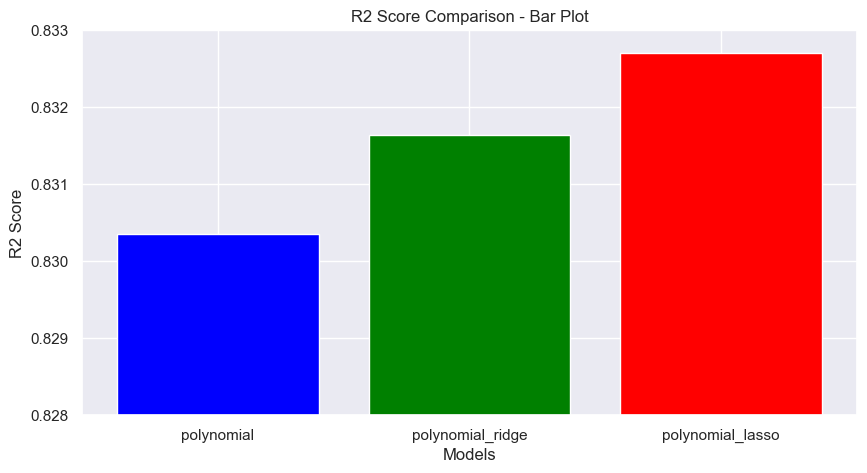

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


# Calculate R2 scores
r2_scores = {
    'polynomial': r2_score(y, y_poly),
    'polynomial_ridge': r2_score(y, y_ridge),
    'polynomial_lasso': r2_score(y, y_lasso)
}


# Bar plot for R2 scores
plt.figure(figsize=(10, 5))
plt.bar(r2_scores.keys(), r2_scores.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('R2 Score Comparison - Bar Plot')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.ylim(0.828,0.833)
plt.show()
